In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD

# Встановлення фіксованого значення для генератора випадкових чисел
np.random.seed(42)

# Завантаження даних
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Параметри моделі
batch_size = 32
nb_classes = 10
nb_epoch = 25
img_rows, img_cols = 32, 32
img_channels = 3

# Нормалізація даних
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Перетворення міток у формат one-hot
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Створення моделі
model = Sequential()

# Додавання шарів згорткової нейромережі
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, img_channels)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# Компіляція моделі
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Навчання моделі
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, shuffle=True, verbose=2)

# Оцінка на тестових даних
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy on test data: {scores[1] * 100:.2f}%")

# Збереження моделі
model.save('my_model.h5')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/25
1407/1407 - 18s - 13ms/step - accuracy: 0.3678 - loss: 1.7225 - val_accuracy: 0.3664 - val_loss: 1.7568
Epoch 2/25
1407/1407 - 5s - 3ms/step - accuracy: 0.5376 - loss: 1.2829 - val_accuracy: 0.6336 - val_loss: 1.0465
Epoch 3/25
1407/1407 - 5s - 4ms/step - accuracy: 0.6044 - loss: 1.1132 - val_accuracy: 0.6708 - val_loss: 0.9514
Epoch 4/25
1407/1407 - 10s - 7ms/step - accuracy: 0.6495 - loss: 0.9948 - val_accuracy: 0.7020 - val_loss: 0.8560
Epoch 5/25
1407/1407 - 5s - 4ms/step - accuracy: 0.6774 - loss: 0.9134 - val_accuracy: 0.6986 - val_loss: 0.8516
Epoch 6/25
1407/1407 - 5s - 3ms/step - accuracy: 0.7006 - loss: 0.8524 - val_accuracy: 0.7312 - val_loss: 0.7799
Epoch 7/25
1407/1407 - 5s - 4ms/step - accuracy: 0.7174 - loss: 0.8084 - val_accuracy: 0.7320 - val_loss: 0.7809
Epoch 8/25
1407/1407 - 11s - 7ms/step - accuracy: 0.7299 - loss: 0.7719 - val_accuracy: 0.7480 - val_loss: 0.7356
Epoch 9/25
1407/1407 - 5s - 4ms/step - accuracy: 0.7358 - loss: 0.7437 - val_accuracy: 0.753

Accuracy on test data: 75.60%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
True class: Truck
Predicted class: Truck


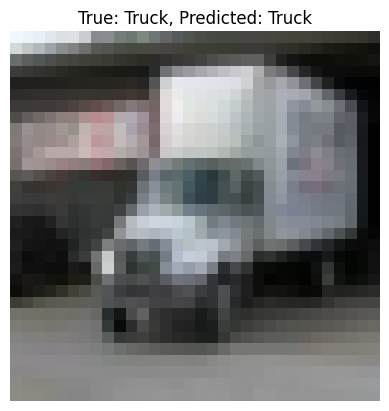

In [2]:
import numpy as np
from keras.models import load_model
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Завантаження моделі
model = load_model('my_model.h5')

# Завантаження даних для перевірки
(_, _), (X_test, y_test) = cifar10.load_data()

# Нормалізація даних
X_test = X_test.astype('float32') / 255

# Словник класів CIFAR-10
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Вибір випадкового зображення для тесту
idx = np.random.randint(0, X_test.shape[0])
test_image = X_test[idx]
test_label = y_test[idx][0]

# Підготовка зображення для моделі
test_image_input = np.expand_dims(test_image, axis=0)

# Прогноз моделі
predictions = model.predict(test_image_input)
predicted_class = np.argmax(predictions)

# Вивід результатів
print(f"True class: {class_labels[test_label]}")
print(f"Predicted class: {class_labels[predicted_class]}")

# Вивід зображення
plt.imshow(test_image)
plt.title(f"True: {class_labels[test_label]}, Predicted: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()
